# 고딕 분류

In [1]:
# 필요한 패키지 임포트
from PIL import Image, ImageDraw, ImageFont
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf 
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Rescaling

from keras.applications import vgg16

from tensorflow.keras import layers

## 데이터셋 생성

In [2]:
# 자음, 모음을 결합하여 만들 수 있는 2350가지의 글자를 한 줄씩 담은 txt파일을 load
# 한 줄씩 읽어와서 리스트로 만듦
charset = [c.strip() for c in open('2350-common-hangul.txt','r',encoding='utf-8').readlines()]

# 폰트 데이터가 저장된 경로
FONT_PATH = './gothic_fonts'

# 데이터셋이 저장될 경로
OUTPUT_PATH = './gothic_datasets'

# 이미지 크기 및 글자 크기 설정
canvas_size = 128
font_size = 80


if not os.path.exists(OUTPUT_PATH):
    os.mkdir(OUTPUT_PATH)

    
fontList = os.listdir(FONT_PATH)
total_cnt = 0

for label, f in enumerate(fontList):
    if not os.path.exists(f'{OUTPUT_PATH}/{label}'):
        os.mkdir(f'{OUTPUT_PATH}/{label}')
    for cnt, c in enumerate(charset):
        # 3채널로 이미지 생성
        image = Image.new('RGB', (canvas_size, canvas_size), color=(255,255,255))
        drawing = ImageDraw.Draw(image)
        font = ImageFont.truetype(os.path.join(FONT_PATH, f), size=font_size)
        w, h = drawing.textsize(c, font=font)
        drawing.text( ((canvas_size-w)/2, (canvas_size-h)/2), c, fill=(0), font=font)
        image.save(os.path.join(f'{OUTPUT_PATH}/{label}',f"{cnt:04d}.jpg"))
        if cnt % 100 == 0:
            print(f"processed {label}\'s {cnt} chars")
    print(f"{label}번째 font data 생성 완료")

C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 0 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 100 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 200 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 300 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 400 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 500 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 600 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 700 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 800 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 900 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 1000 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 1100 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 1200 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 1300 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 1400 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 1500 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 1600 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 1700 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 1800 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 1900 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 2000 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 2100 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 2200 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 0's 2300 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

0번째 font data 생성 완료
processed 1's 0 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 100 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 200 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 300 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 400 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 500 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 600 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 700 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 800 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 900 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 1000 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 1100 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 1200 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 1300 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 1400 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 1500 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 1600 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 1700 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 1800 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 1900 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 2000 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 2100 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 2200 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 1's 2300 chars
1번째 font data 생성 완료
processed 2's 0 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 100 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 200 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 300 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 400 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 500 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 600 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 700 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 800 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 900 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 1000 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 1100 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 1200 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 1300 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 1400 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 1500 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 1600 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 1700 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 1800 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 1900 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 2000 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 2100 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 2200 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 2's 2300 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

2번째 font data 생성 완료
processed 3's 0 chars
processed 3's 100 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 3's 200 chars
processed 3's 300 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 3's 400 chars
processed 3's 500 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 3's 600 chars
processed 3's 700 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 3's 800 chars
processed 3's 900 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 3's 1000 chars
processed 3's 1100 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 3's 1200 chars
processed 3's 1300 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 3's 1400 chars
processed 3's 1500 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 3's 1600 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 3's 1700 chars
processed 3's 1800 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 3's 1900 chars
processed 3's 2000 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 3's 2100 chars
processed 3's 2200 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 3's 2300 chars
3번째 font data 생성 완료
processed 4's 0 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 100 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 200 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 300 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 400 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 500 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 600 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 700 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 800 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 900 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 1000 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 1100 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 1200 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 1300 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 1400 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 1500 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 1600 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 1700 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 1800 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 1900 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 2000 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 2100 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 2200 chars


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

processed 4's 2300 chars
4번째 font data 생성 완료


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbo

## data load & train test split

In [16]:
# 매개변수 설정
data_dir='./gothic_datasets'
batch_size = 32
img_height = 128
img_width = 128

In [17]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 11750 files belonging to 5 classes.
Using 9400 files for training.


In [18]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11750 files belonging to 5 classes.
Using 2350 files for validation.


## 데이터 증강 레이어

In [19]:
data_augmentation = Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(128, 128, 3)),
        tf.keras.layers.experimental.preprocessing.RandomContrast(0.9),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)

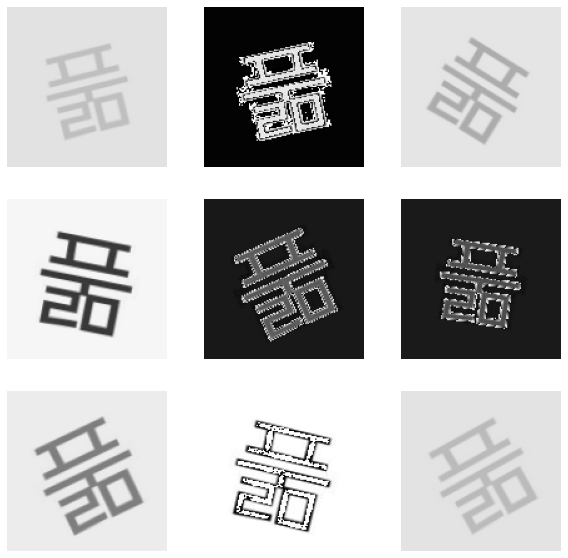

In [26]:
# 데이터 증강 함수 적용한 사진 9장 출력

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
        #print(np.shape(augmented_images))

## VGG 모델

In [21]:
transfer_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
transfer_model.trainable = False

vgg_model=Sequential()
vgg_model.add(data_augmentation)
vgg_model.add(transfer_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(64, activation='relu'))
vgg_model.add(Dense(5, activation='softmax', name='output'))

vgg_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [22]:
vgg_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 128, 128, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                524352    
_________________________________________________________________
output (Dense)               (None, 5)                 325       
Total params: 15,239,365
Trainable params: 524,677
Non-trainable params: 14,714,688
_________________________________________________________________


In [23]:
v_hist = vgg_model.fit(train_ds, validation_data=val_ds, epochs=30)

Epoch 1/30
294/294 [==============================] - 15s 49ms/step - loss: 0.8433 - accuracy: 0.7760 - val_loss: 0.3892 - val_accuracy: 0.8600
Epoch 2/30
294/294 [==============================] - 14s 48ms/step - loss: 0.2193 - accuracy: 0.9248 - val_loss: 0.2371 - val_accuracy: 0.9204
Epoch 3/30
294/294 [==============================] - 14s 49ms/step - loss: 0.1620 - accuracy: 0.9437 - val_loss: 0.2194 - val_accuracy: 0.9302
Epoch 4/30
294/294 [==============================] - 15s 49ms/step - loss: 0.1496 - accuracy: 0.9474 - val_loss: 0.6837 - val_accuracy: 0.7996
Epoch 5/30
294/294 [==============================] - 15s 49ms/step - loss: 0.1341 - accuracy: 0.9556 - val_loss: 0.4168 - val_accuracy: 0.8868
Epoch 6/30
294/294 [==============================] - 15s 49ms/step - loss: 0.1098 - accuracy: 0.9618 - val_loss: 0.2744 - val_accuracy: 0.9238
Epoch 7/30
294/294 [==============================] - 15s 49ms/step - loss: 0.1159 - accuracy: 0.9610 - val_loss: 0.2247 - val_accuracy:

## acc & loss 그래프

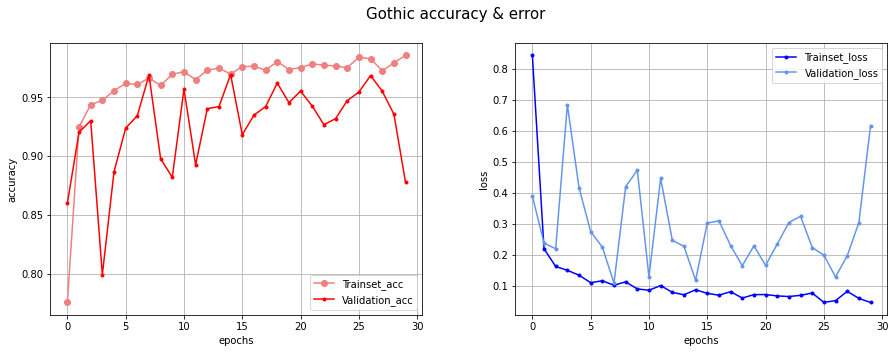

In [25]:
# 1행 2열로 acc, loss 그래프 출력

row=1
col=2

f, axes = plt.subplots(row, col)
f.set_size_inches((15,5))
plt.subplots_adjust(wspace = 0.25, hspace = 0.45)

acc = v_hist.history['accuracy']
loss = v_hist.history['loss']
val_acc= v_hist.history['val_accuracy']
val_loss = v_hist.history['val_loss']

x_len=range(len(loss))

# figure 전체 제목
f.suptitle('Gothic accuracy & error', fontsize = 15)

axes[0].plot(x_len, acc, marker='o', c="lightcoral", label='Trainset_acc')
axes[0].plot(x_len, val_acc, marker='.', c='red', label='Validation_acc')
axes[0].legend(loc='lower right')
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('accuracy')
axes[0].grid(True)


# 일반 acc, loss
axes[1].plot(x_len, loss, marker='.', c="blue", label='Trainset_loss')
axes[1].plot(x_len, val_loss, marker='.', c='cornflowerblue', label='Validation_loss')
axes[1].legend(loc='upper right')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('loss')
axes[1].grid(True)


plt.show()